In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os
from sklearn.preprocessing import power_transform

In [2]:
path = r"C:\Users\ncc892\Desktop\kaggle_competition\playground-series-s5e11.zip"

with ZipFile(path , 'r') as zippath:
    zippath.printdir()


File Name                                             Modified             Size
sample_submission.csv                          2025-10-28 23:08:48      2291139
test.csv                                       2025-10-28 23:08:48     23021430
train.csv                                      2025-10-28 23:08:50     55988519


In [3]:
with ZipFile(path, 'r') as zipref:
    with zipref.open('train.csv') as file:
        df = pd.read_csv(file)
    
    with zipref.open('test.csv') as data:
        test_data = pd.read_csv(data)

# train_data = pd.read_csv()


In [4]:
train_data = df.copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


# EDA Analysis

In [5]:
train_data.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [6]:
# Drop id(irrelevant)
train_data.drop(columns=['id'], inplace=True)

In [7]:
train_data.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [8]:
num_cols = train_data.select_dtypes(include='number').columns

cat_cols = train_data.select_dtypes(include='object').columns

### Check the distribution of the numerical columns

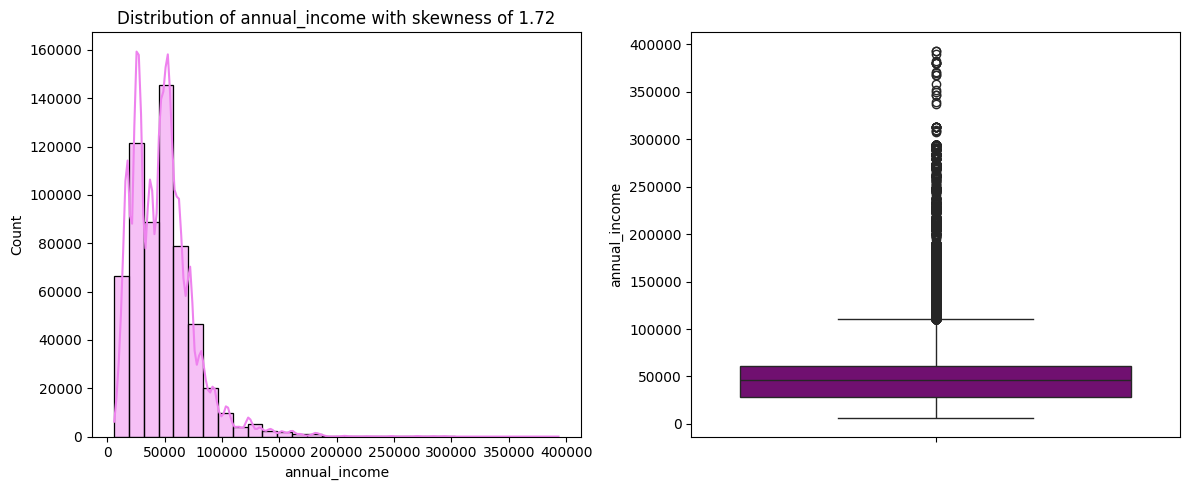

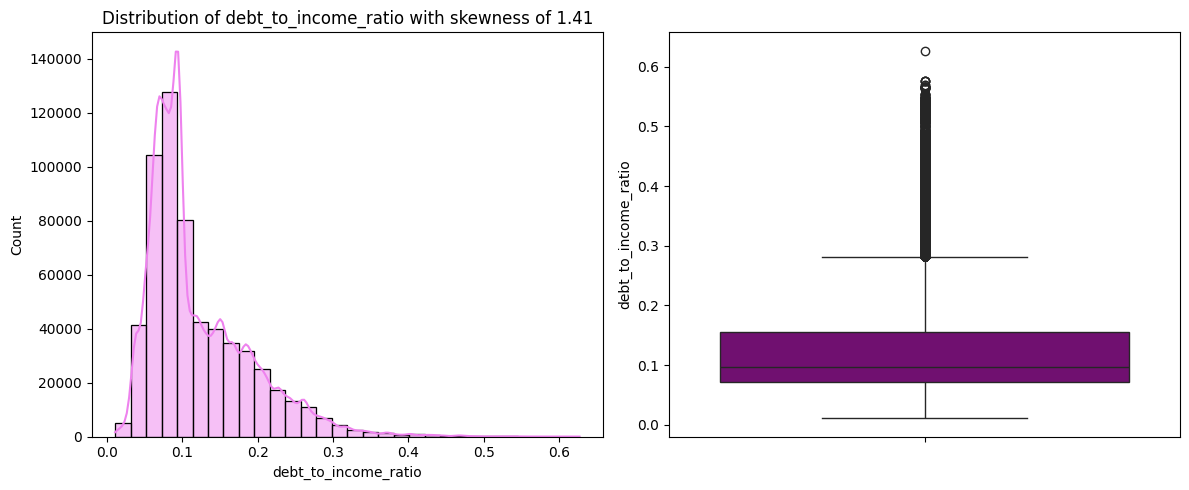

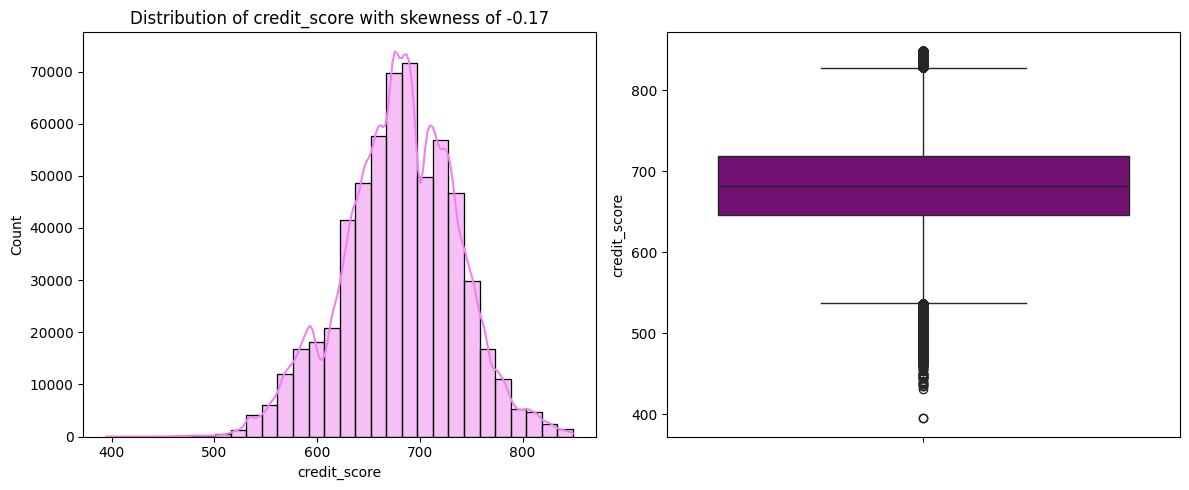

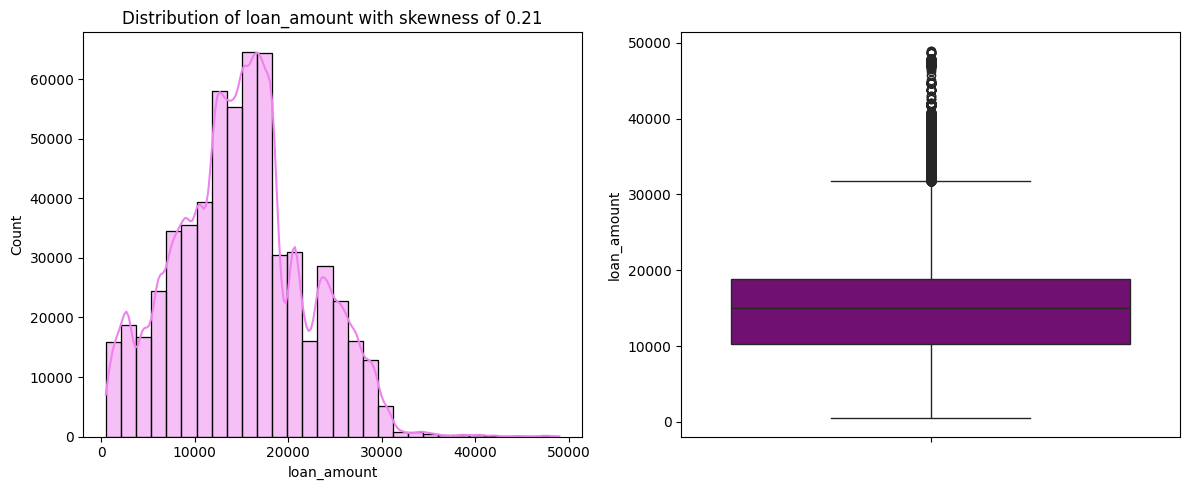

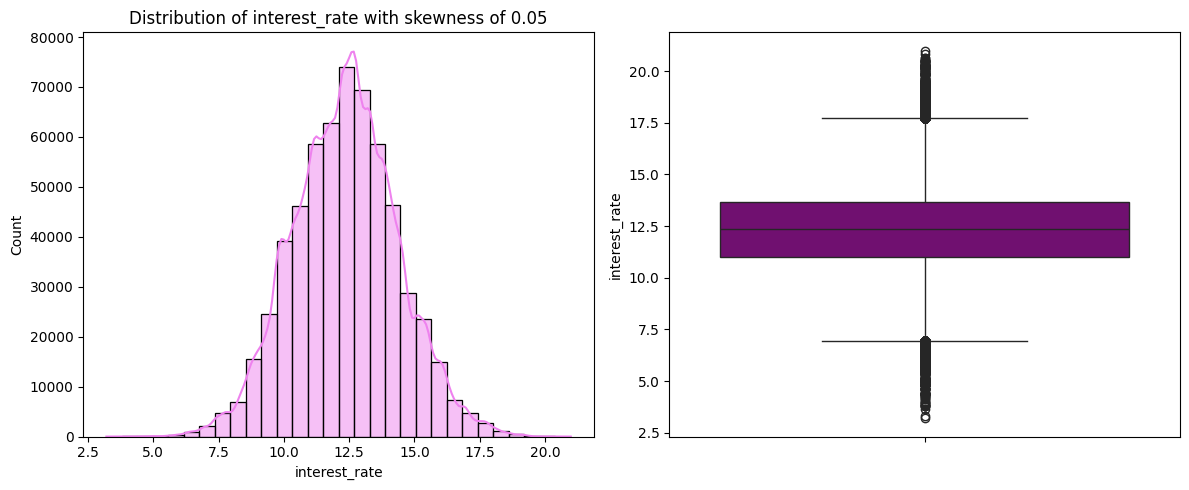

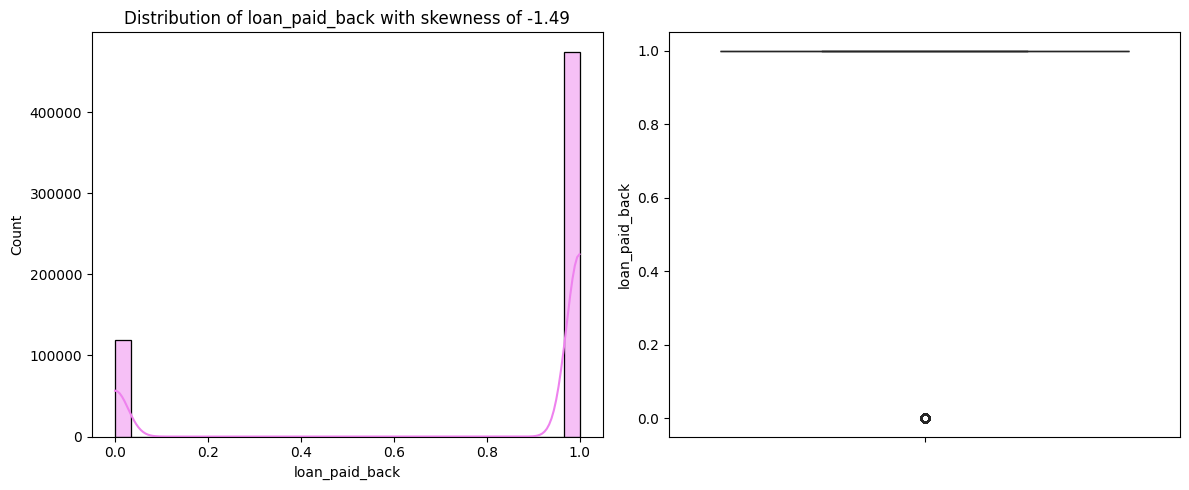

In [9]:
def univariate_for_num_cols(train_data, num_cols):
    for col in num_cols:
        plt.figure(figsize=(12, 5))
        plt.subplot(1,2,1)
        sns.histplot(data = train_data[col], kde=True, bins=30, color= 'violet')
        plt.title(f'Distribution of {col} with skewness of {train_data[col].skew():.2f}')
        plt.subplot(1, 2, 2)
        sns.boxplot(data=train_data[col], color='purple')

        plt.tight_layout()
        plt.show()
    
univariate_for_num_cols(train_data, num_cols)

In [10]:
def univariate_categorical(df, cat_cols):
    for col in cat_cols:
        print(df[col].value_counts())
        print( )

univariate_categorical(train_data, cat_cols)

gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64

education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64

employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64

grade_subgrade
C3    58695
C4    55957
C2    54443
C1    53363
C5    53317
D1    37029
D3    36694
D4    35097
D2    34432
D5    32101
B2    15167
B1    14344
B5    13937
B3    13926
B4    13877
E4     8036


# Export the Data

In [11]:
train_data.to_csv('eda_cleaned_train_data.csv', index=False)